
# Bayesian deep-learning

### [Launch in Google Colab](https://colab.research.google.com/github/rahulremanan/python_tutorial/blob/master/Machine_Vision/07_Bayesian_deep_learning/notebook/Bayesian_Fashion_MNIST.ipynb)

Bayesian deep-learning network using [dropout layers to perform Monte Carlo approximations](https://arxiv.org/pdf/1506.02142.pdf) for quantifying model uncertainty.

# Overview

This notebook uses the fashion MNIST dataset and a Bayesain deep-learning model. If the Google Cloud TPU is attached to the notebook, the model can utilize the TPU to accelerate the training and inference performance.

# Learning goals

*   Build a Bayesian deep-learning network in Keras
*   Create and compile the model under a distribution strategy that uses TPUs
*   Run Bayesian inference

# Instructions

<h3>  &nbsp;&nbsp;Train on Google Colab using TPU&nbsp;&nbsp; <a href="https://colab.research.google.com/"><img valign="middle" src="https://raw.githubusercontent.com/rahulremanan/python_tutorial/master/Machine_Vision/07_Bayesian_deep_learning/media/tpu-hexagon.png" width="50"></a></h3>

1. On the main menu, click Runtime and select **Change runtime type**. Set "TPU" as the hardware accelerator.
1. Click Runtime again and select **Runtime > Run All**. You can also run the cells manually with Shift-ENTER. 

## A quick word about TPUs

TPUs are currently available only in the Google Cloud. They are designed to read the data directly from Google Cloud Storage (GCS). Therefore, local datasets need to be either stored in the cloud instance memory to pass it to the TPU or as a GCS bucket so that the TPU can access it. For developers, this means that the typical generator functions that can handle CPUs or GPUs will therefore fail when trying to use TPUs, necessitating custom TPU specific generator functions. In this notebook, we are using the first approach by storing the entire fashion MNIST dataset in the instance memory. This approach of handling the dataset without a generator function works well in this particular case due to the manageable size of the dataset.

# Bayesian deep-learning using Fashion MNIST, Keras and TPUs

## Import

In [ ]:
%tensorflow_version 2.x
import os

import numpy as np
import tensorflow as tf

from tqdm import tqdm
from matplotlib import pyplot
%matplotlib inline
print("Tensorflow version " + tf.__version__)

Tensorflow version 2.3.0


## Specify variables

In [ ]:
WEIGHTS_FILE='./bayesian_fashionMNIST.h5'
GITHUB_REPO='https://github.com/rahulremanan/python_tutorial/'
WEIGHTS_URL='{}raw/master/Machine_Vision/07_Bayesian_deep_learning/weights/bayesian_fashionMNIST.h5'.format(GITHUB_REPO)
LABEL_NAMES = ['t_shirt','trouser','pullover','dress','coat','sandal','shirt','sneaker','bag','ankle_boots']

# Fashion MNIST dataset

The fashion MNIST dataset is available as a `tf.keras.datasets`.

In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

# add empty color dimension
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

4423680/4422102 [==============================] - 0s 0us/step


# Define the Bayesian deep-learning model

The following example uses a single layer conv-net with a dropout layer for doing the Monte Carlo approximations during Bayesian inference.

In [ ]:
def fashioMNIST_model(input_data,dropout_rate=0.5,model_name="Bayesian_fashionMNIST",enable_bayesian_inference=True):
  inputs = tf.keras.Input(shape=(input_data.shape[1:]))
  x = tf.keras.layers.Conv2D(128,(3,3))(inputs)
  x = tf.keras.layers.MaxPooling2D(pool_size=(2,2),strides=(2,2))(x)
  x = tf.keras.layers.Activation('elu')(x)
  x = tf.keras.layers.Dropout(dropout_rate)(x,training=enable_bayesian_inference)
  x = tf.keras.layers.Flatten()(x)
  x = tf.keras.layers.Dense(10)(x)
  outputs = tf.keras.layers.Activation('softmax')(x)
  model = tf.keras.Model(inputs=inputs,outputs=outputs,name=model_name)
  return model

# Using the TPU

To use the TPU for training and inference, first the TPU device needs to be initialized. Then the model has to be built and compiled specifically to use the TPU.

In [ ]:
tpu = tf.distribute.cluster_resolver.TPUClusterResolver()
print('Running on TPU ', tpu.cluster_spec().as_dict()['worker'])

tf.config.experimental_connect_to_cluster(tpu)
tf.tpu.experimental.initialize_tpu_system(tpu)

strategy = tf.distribute.experimental.TPUStrategy(tpu)
print("REPLICAS: ", strategy.num_replicas_in_sync)

Running on TPU  ['10.47.230.106:8470']
INFO:tensorflow:Initializing the TPU system: grpc://10.47.230.106:8470


INFO:tensorflow:Initializing the TPU system: grpc://10.47.230.106:8470


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Found TPU system:


INFO:tensorflow:Found TPU system:


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


REPLICAS:  8


In [ ]:
with strategy.scope():
  bayesian_model = fashioMNIST_model(x_train,enable_bayesian_inference=True)
  bayesian_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
                         loss=tf.keras.losses.sparse_categorical_crossentropy,
                         metrics=[tf.keras.metrics.sparse_categorical_accuracy])

# Train

## Download pre-trained weights

In [ ]:
if not os.path.exists(WEIGHTS_FILE):
  !wget {WEIGHTS_URL} -O {WEIGHTS_FILE}

--2020-10-21 10:30:00--  https://github.com/rahulremanan/python_tutorial/raw/master/Machine_Vision/07_Bayesian_deep_learning/weights/bayesian_fashionMNIST.h5
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://media.githubusercontent.com/media/rahulremanan/python_tutorial/master/Machine_Vision/07_Bayesian_deep_learning/weights/bayesian_fashionMNIST.h5 [following]
--2020-10-21 10:30:00--  https://media.githubusercontent.com/media/rahulremanan/python_tutorial/master/Machine_Vision/07_Bayesian_deep_learning/weights/bayesian_fashionMNIST.h5
Resolving media.githubusercontent.com (media.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to media.githubusercontent.com (media.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 888208 (867K) [application/octet-strea

In [ ]:
if os.path.exists(WEIGHTS_FILE):
  bayesian_model.load_weights(WEIGHTS_FILE)
  print('Loaded pre-trained weights: {} ...'.format(WEIGHTS_FILE))

Loaded pre-trained weights: ./bayesian_fashionMNIST.h5 ...


## Training the fashion MNIST Bayesian deep-learning model

In [ ]:
bayesian_model.fit(x_train.astype(np.float32),y_train.astype(np.float32),
                   epochs=5,
                   steps_per_epoch=60,
                   validation_data=(x_test.astype(np.float32),y_test.astype(np.float32)),
                   validation_freq=1)

bayesian_model.save_weights(WEIGHTS_FILE,overwrite=True)

Epoch 1/5
 1/60 [..............................] - ETA: 33s - loss: 0.2634 - sparse_categorical_accuracy: 0.9060WARNING:tensorflow:Callbacks method `on_train_batch_end` is slow compared to the batch time (batch time: 0.0010s vs `on_train_batch_end` time: 0.0122s). Check your callbacks.


59/60 [============================>.] - ETA: 0s - loss: 0.5861 - sparse_categorical_accuracy: 0.8744WARNING:tensorflow:From /usr/local/lib/python3.6/dist-packages/tensorflow/python/data/ops/multi_device_iterator_ops.py:601: get_next_as_optional (from tensorflow.python.data.ops.iterator_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use `tf.data.Iterator.get_next_as_optional()` instead.


Instructions for updating:
Use `tf.data.Iterator.get_next_as_optional()` instead.


60/60 [==============================] - 6s 103ms/step - loss: 0.5819 - sparse_categorical_accuracy: 0.8747 - val_loss: 0.4841 - val_sparse_categorical_accuracy: 0.8741
Epoch 2/5
60/60 [==============================] - 4s 66ms/step - loss: 0.3377 - sparse_categorical_accuracy: 0.8965 - val_loss: 0.5173 - val_sparse_categorical_accuracy: 0.8646
Epoch 3/5
60/60 [==============================] - 3s 55ms/step - loss: 0.3236 - sparse_categorical_accuracy: 0.8993 - val_loss: 0.5180 - val_sparse_categorical_accuracy: 0.8701
Epoch 4/5
60/60 [==============================] - 3s 54ms/step - loss: 0.3185 - sparse_categorical_accuracy: 0.8999 - val_loss: 0.5686 - val_sparse_categorical_accuracy: 0.8646
Epoch 5/5
60/60 [==============================] - 3s 57ms/step - loss: 0.3261 - sparse_categorical_accuracy: 0.9010 - val_loss: 0.5018 - val_sparse_categorical_accuracy: 0.8721


# Bayesian inference
The inference step is repeated over and over again to obtain the model uncertainty associated with each prediction class. Unlike in the regular deep-learning architecture, each inference step returns a different set of probabilities for each class. The final accuracy is calculated as the class-wise mean of all the probabilities. The model uncertainty is numerically represented as the class-wise standard deviation of all the probabilities.

In [ ]:
with strategy.scope():
  bayesian_model = fashioMNIST_model(x_train,enable_bayesian_inference=True)
  bayesian_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
                         loss=tf.keras.losses.sparse_categorical_crossentropy,
                         metrics=[tf.keras.metrics.sparse_categorical_accuracy])
bayesian_model.load_weights(WEIGHTS_FILE)

In [ ]:
preds=[]
num_bayesian_inference_steps=10
for i in tqdm(range(num_bayesian_inference_steps)):
  preds.append(bayesian_model.predict(x_test[:16].astype(np.float32)))
mean_preds=np.mean(np.asarray(preds),axis=0)
stdev_preds=np.std(np.asarray(preds),axis=0)

100%|██████████| 10/10 [00:03<00:00,  2.56it/s]


## Visualize predictions

In [ ]:
def plot_predictions(images,ground_truths,
                     preds_acc,preds_stdev=None,
                     label_names=None,
                     enable_bayesian_inference=True):
  n = images.shape[0]
  nc = int(np.ceil(n / 4))
  f, axes = pyplot.subplots(nc, 4)
  for i in range(nc * 4):
    y = i // 4
    x = i % 4
    axes[x, y].axis('off')
    
    label = label_names[np.argmax(preds_acc[i])]
    ground_truth=label_names[ground_truths[i]]
    accuracy = np.max(preds_acc[i])
    if enable_bayesian_inference and preds_stdev is not None:
      confidence = preds_stdev[i][np.argmax(preds_acc[i])]

    if i > n:
      continue
    axes[x, y].imshow(images[i])
    if enable_bayesian_inference and preds_stdev is not None:
      axes[x, y].text(0.5,0.5, '\nLabel (Actual): {} ({})'.format(label,ground_truth) + 
                               '\nAccuracy: {}, \nUncertainty: {}\n'.format(str(round(accuracy,2)),
                                                                            str(round(confidence,2))),
                      fontsize=10)
    else:
      axes[x, y].text(0.5,0.5, '\nLabel: {}'.format(label) + 
                               '\nAccuracy: {} \n'.format(str(round(accuracy,2))),
                      fontsize=10)
    pyplot.gcf().set_size_inches(16,16)

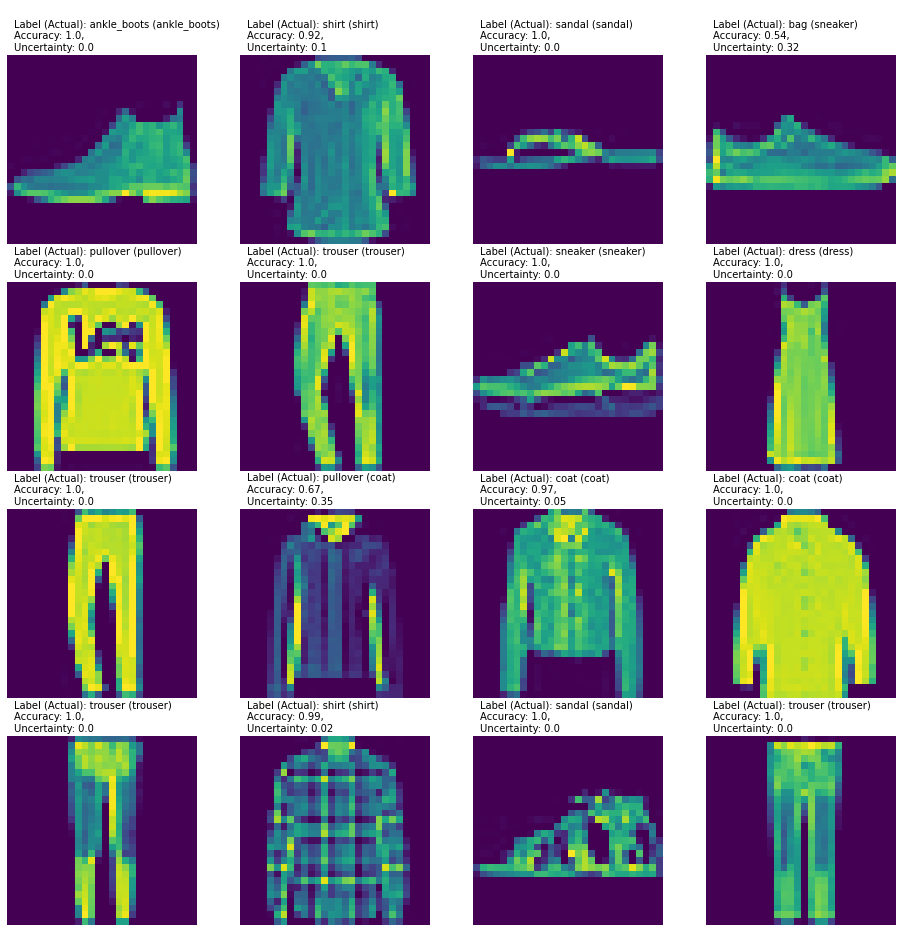

In [ ]:
plot_predictions(np.squeeze(x_test[:16]), y_test[:16],
                 mean_preds,stdev_preds,
                 label_names=LABEL_NAMES,
                 enable_bayesian_inference=True)

# Learning tasks:
* Compare and contrast a regular deep-learning architecture and the Bayesian deep-learning architecture described in this notebook
* Implement a regular inference (non-Bayesian) using the same model architecture and model weights used in this notebook